In [3]:
import pandas as pd
df=pd.read_csv('Data.csv')
print(df.head())

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


In [4]:
d=pd.DataFrame({'Country':['France','Spain'],'Age':[44,27],'Salary':[72000,480000],'Purchased':['No','Yes']})
print(d)

  Country  Age  Salary Purchased
0  France   44   72000        No
1   Spain   27  480000       Yes


In [5]:
print(d.shape)
print(d.dtypes)
print(d.columns)
print(d.index)

(2, 4)
Country      object
Age           int64
Salary        int64
Purchased    object
dtype: object
Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')
RangeIndex(start=0, stop=2, step=1)


In [6]:
print(d['Country'])  ##prints specific column

0    France
1     Spain
Name: Country, dtype: object


In [7]:
print(d.loc[0])  ##prints specific row

Country      France
Age              44
Salary        72000
Purchased        No
Name: 0, dtype: object


In [8]:
print(d[['Country','Age']])  ##prints multiple column

  Country  Age
0  France   44
1   Spain   27


In [9]:
d['Name']=['Tom','Jerry'] ##Adding new column
print(d)

  Country  Age  Salary Purchased   Name
0  France   44   72000        No    Tom
1   Spain   27  480000       Yes  Jerry


In [10]:
print(d[d['Age']>27])

  Country  Age  Salary Purchased Name
0  France   44   72000        No  Tom


In [11]:
import torch
x=torch.tensor([1,2,3,4])
print(x)

tensor([1, 2, 3, 4])


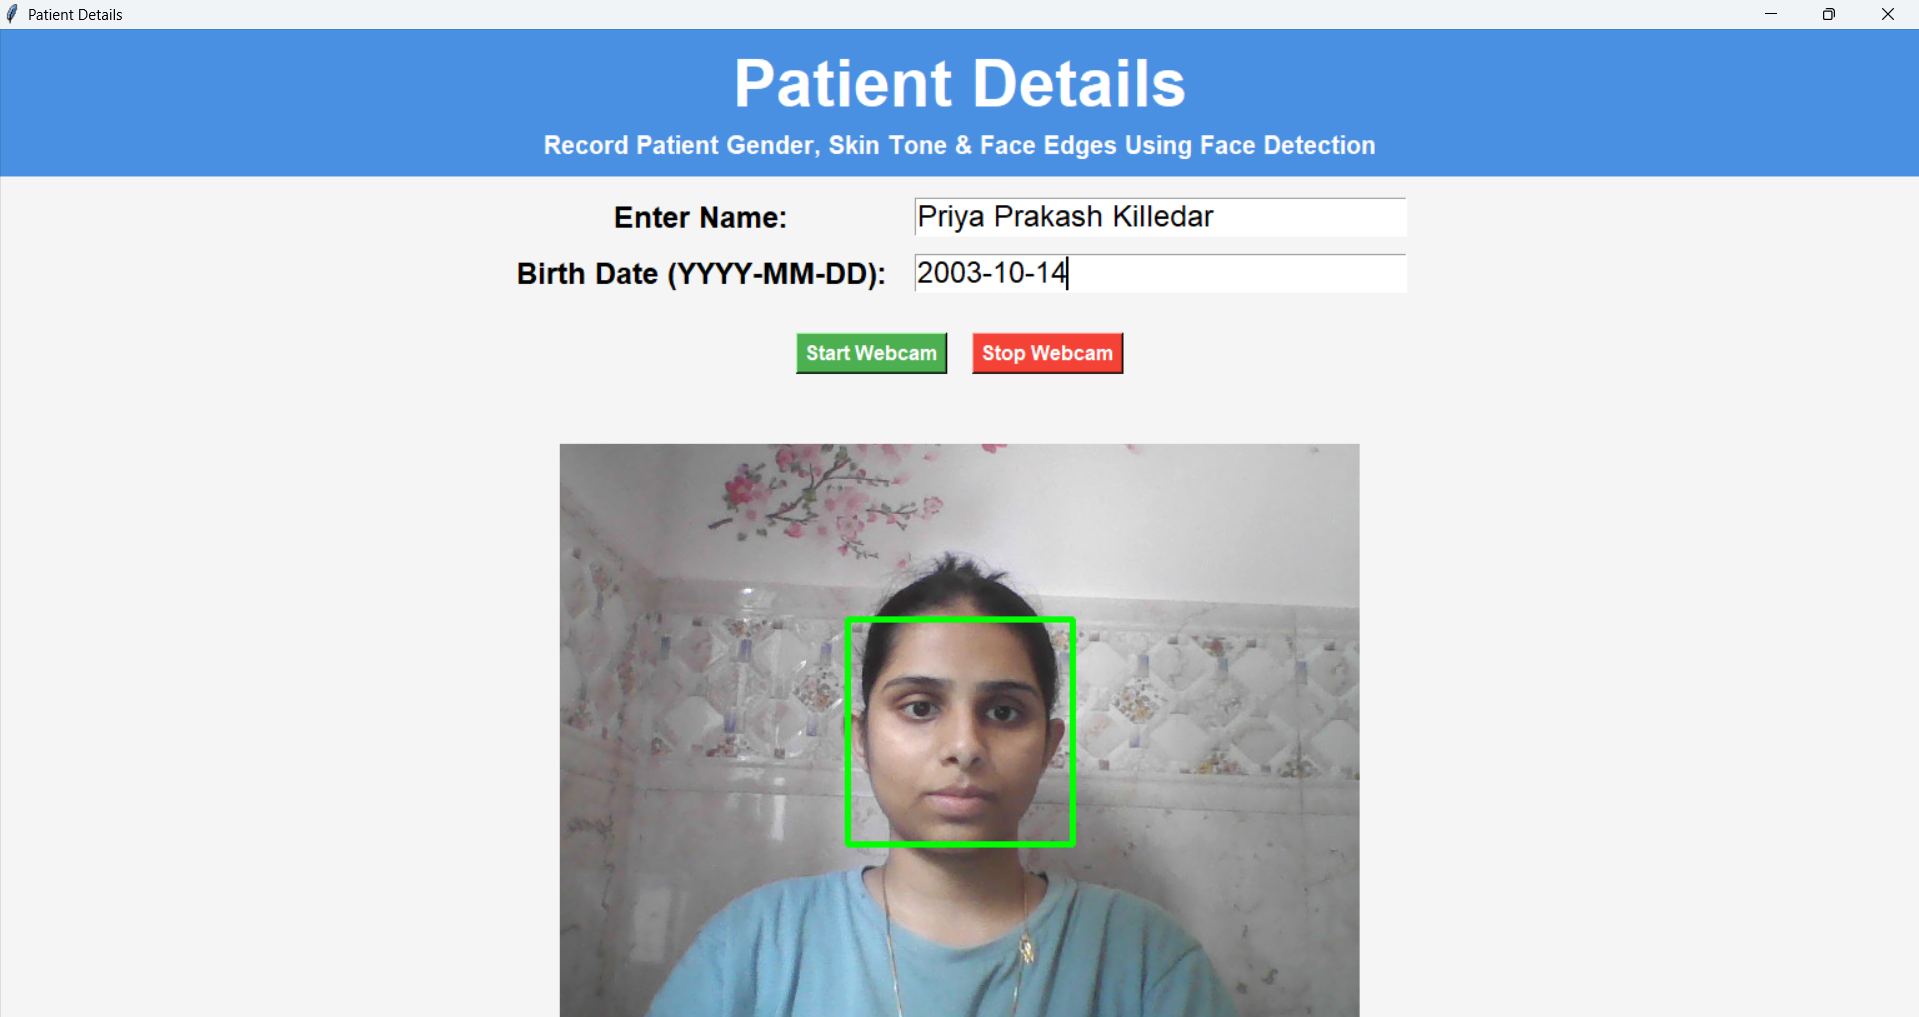

-1

In [12]:
from google.colab.patches import cv2_imshow
import cv2
img=cv2.imread('/content/Screenshot 2025-03-31 132707.png')
cv2_imshow(img)
cv2.waitKey(0)

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [14]:
df = sns.load_dataset('titanic')
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [15]:
#Handle Missing Values :
df = df [['age','fare','pclass','survived']]
df

,age,fare,pclass,survived
0,22.0,7.2500,3,0
1,38.0,71.2833,1,1
2,26.0,7.9250,3,1
3,35.0,53.1000,1,1
4,35.0,8.0500,3,0
...,...,...,...,...
886,27.0,13.0000,2,0
887,19.0,30.0000,1,1
888,NaN,23.4500,3,0
889,26.0,30.0000,1,1


In [16]:
df.fillna(df.median(numeric_only=True),inplace=True)
df.isnull().sum()

,0
age,0
fare,0
pclass,0
survived,0


In [17]:
#) Identify Outliers using z-score
z_score = np.abs(stats.zscore(df[['age','fare']]))
outlier_z=df[(z_score>3).any(axis=1)]

In [18]:
#Identify Outliers using IQR
Q1=df[['age','fare']].quantile(0.25)#compute the 25th percentile
Q3=df[['age','fare']].quantile(0.75)
IQR=Q3-Q1
outlier_iqr=df[((df[['age','fare']]<(Q1-1.2*IQR)) | (df[['age','fare']])> (Q3 + 1.2 *
IQR)).any(axis=1)]
print("outliers detected using Z-score:/n",outlier_z)

outliers detected using Z-score:/n       age      fare  pclass  survived
27   19.0  263.0000       1         0
88   23.0  263.0000       1         1
96   71.0   34.6542       1         0
116  70.5    7.7500       3         0
118  24.0  247.5208       1         0
258  35.0  512.3292       1         1
299  50.0  247.5208       1         1
311  18.0  262.3750       1         1
341  24.0  263.0000       1         1
377  27.0  211.5000       1         0
380  42.0  227.5250       1         1
438  64.0  263.0000       1         0
493  71.0   49.5042       1         0
527  28.0  221.7792       1         0
557  28.0  227.5250       1         0
630  80.0   30.0000       1         1
672  70.0   10.5000       2         0
679  36.0  512.3292       1         1
689  15.0  211.3375       1         1
700  18.0  227.5250       1         1
716  38.0  227.5250       1         1
730  29.0  211.3375       1         1
737  35.0  512.3292       1         1
742  21.0  262.3750       1         1
745  70.0   71.

In [19]:
print("outliers detected using IQR:/n",outlier_iqr)

outliers detected using IQR:/n Empty DataFrame
Columns: [age, fare, pclass, survived]
Index: []
